# Los Angeles Crime Analysis:
## crimes.csv

| Column           | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `'DR_NO'`        | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits.                                                                                                                                                                                                                                                                                                                                                                                                                |
| `'Date Rptd'`    | Date reported - MM/DD/YYYY.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| `'DATE OCC'`     | Date of occurrence - MM/DD/YYYY.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| `'TIME OCC'`     | In 24-hour military time.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| `'AREA NAME'`    | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.                                                                                                                                                                                             |
| `'Crm Cd Desc'`  | Indicates the crime committed.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| `'Vict Age'`     | Victim's age in years.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| `'Vict Sex'`     | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown.                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'`  | Description of the weapon used (if applicable).                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| `'Status Desc'`  | Crime status.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| `'LOCATION'`     | Street address of the crime.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
 The data comes from https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/data_preview

In [2]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("data/Crime_Data.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,2021 Apr 11 12:00:00 AM,2020 Nov 07 12:00:00 AM,0845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,2020 Oct 21 12:00:00 AM,2020 Oct 18 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,2024 Dec 10 12:00:00 AM,2020 Oct 30 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,2020 Dec 24 12:00:00 AM,2020 Dec 24 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,2020 Oct 03 12:00:00 AM,2020 Sep 29 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


## Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour

In [3]:
crimes['TIME OCC'] = crimes['TIME OCC'].astype(int)
crime_hour = crimes['TIME OCC'] // 100
peak_crime_hour = crime_hour.value_counts().idxmax()
peak_crime_hour

np.int64(12)

## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location

In [4]:
crimes['hour'] = crimes['TIME OCC'] // 100
crimes['is_night'] = (crimes['hour'] >= 22) | (crimes['hour'] < 4)
peak_night_crime_location = crimes.groupby('AREA NAME')['is_night'].size().idxmax()
peak_night_crime_location

'Central'

## Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [5]:
victim_ages = pd.Series({
    "0-17": (crimes['Vict Age'] < 18).sum(),
    "18-25": ((crimes['Vict Age'] >= 18) & (crimes['Vict Age'] < 26)).sum(),
    "26-34": ((crimes['Vict Age'] >= 26) & (crimes['Vict Age'] < 35)).sum(),
    "35-44": ((crimes['Vict Age'] >= 35) & (crimes['Vict Age'] < 45)).sum(),
    "45-54": ((crimes['Vict Age'] >= 45) & (crimes['Vict Age'] < 55)).sum(),
    "55-64": ((crimes['Vict Age'] >= 55) & (crimes['Vict Age'] < 65)).sum(),
    "65+": (crimes['Vict Age'] >= 65).sum()
})

victim_ages

0-17     294957
18-25    114074
26-34    186103
35-44    162147
45-54    112739
55-64     79458
65+       55513
dtype: int64

## Ethnicities with the most crimes commited against them.

<Axes: xlabel='Vict Descent', ylabel='count'>

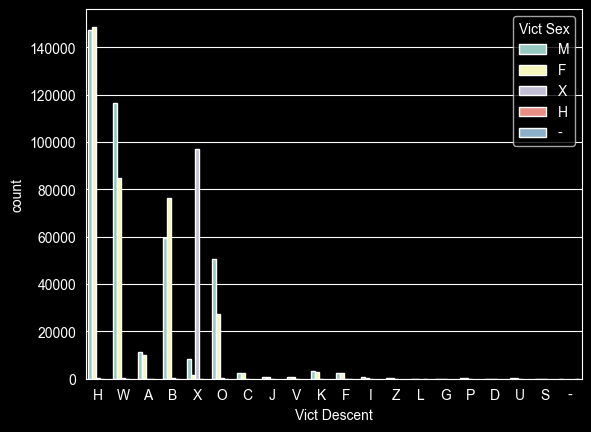

In [7]:
crimes['Vict Descent'].value_counts().idxmax()
sns.countplot(data=crimes, x="Vict Descent",hue='Vict Sex')